# Análisis de Datos del Dataset Monopoly

# Fase 1: Entendiendo el Negocio

Contexto: El análisis se centra en comprender el comportamiento financiero de los clientes de Monopoly, utilizando un enfoque en la predicción de su facturación futura (Fac_T12). Este dato es clave para evaluar cuánto dinero un cliente generará en ingresos para la empresa a través del uso de productos financieros como tarjetas de crédito (TC) y débito (TD). La facturación refleja los montos totales gastados por los clientes en transacciones nacionales, internacionales, y avances de crédito, proporcionando una visión integral de su valor para la organización.

Objetivos:

1. Identificar los factores que influyen en la facturación, como la renta, la antigüedad, la edad y la actividad transaccional del cliente.

2. Desarrollar un modelo predictivo que permita estimar la facturación futura de los clientes, basado en patrones históricos.

3. Segmentar a los clientes según su valor financiero proyectado, enfocándose en aquellos con mayor potencial de facturación.

4. Proporcionar información que permita a la empresa diseñar estrategias personalizadas para retención y maximización de ingresos.

Importancia: La predicción de la facturación no solo permite anticipar flujos de ingresos, sino también optimizar recursos al focalizar esfuerzos en clientes de alto valor. Esto ayuda a mejorar la fidelización y aumentar el retorno de inversión en campañas de marketing y promociones.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("C:/Users/Nico/Documents/monopoly/monopoly/data/01_raw/Base_clientes_Monopoly_actualizado-0.xlsx", engine='openpyxl')

In [3]:
dfo = df.copy()

## Fase 2: Exploración Inicial del Dataset

Revisaremos la estructura del dataset, los primeros registros y las estadísticas generales. Incluiremos visualizaciones para variables clave.

muestra el número total de filas y columnas del dataset en formato (filas, columnas).

In [4]:
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (51124, 574)


Entrega los nombres de las columnas 

In [5]:
print(f'Nombre de las columnas: {df.columns.tolist()}')

Nombre de las columnas: ['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'FlgAct_T12', 'FlgActCN_T12', 'FlgActCI_T12', 'FlgActAN_T12', 'FlgActAI_T12', 'FlgActPAT_T12', 'FlgActCCPC_T12', 'FlgActCCOT_T12', 'FlgActCOL_T12', 'Fac_T12', 'Txs_T12', 'FacCN_T12', 'TxsCN_T12', 'FacCI_T12', 'TxsCI_T12', 'FacAN_T12', 'TxsAN_T12', 'FacAI_T12', 'TxsAI_T12', 'FacPAT_T12', 'TxsPAT_T12', 'FacCCPC_T12', 'TxsCCPC_T12', 'FacCCOT_T12', 'TxsCCOT_T12', 'FacCOL_T12', 'TxsCOL_T12', 'FacDebCom_T12', 'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12', 'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12', 'ColL2AC_T12', 'ColL2CC_T12', 'ColMx_T12', 'PagoNac_T12', 'PagoInt_T12', 'EeccNac_T12', 'EeccInt_T12', 'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12', 'IndRev_T12', 'FlgAct_T11', 'FlgActCN_T11', 'FlgActCI_T11', 'FlgActAN_T11', 'FlgActAI

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Columns: 574 entries, Id to target
dtypes: float64(508), int64(53), object(13)
memory usage: 223.9+ MB


Genera estadísticas descriptivas para todas las columnas, como promedio, mediana, valores mínimos y máximos (para numéricas), y conteos o valores únicos (para categóricas).

In [7]:
df.describe(include='all')

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
count,51124.000000,51124.000000,51123,51071.000000,51124.000000,3.775900e+04,51124.000000,51124.000000,51124.000000,51124.000000,...,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,51124.000000,5.112400e+04,5.112400e+04,51124.000000,51124,51124.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,NaN
freq,NaN,NaN,27410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38269,NaN
mean,25562.500000,182.024274,NaN,10.828220,38.702879,6.630771e+05,38.896154,0.684199,0.256181,0.381347,...,5.237914e+03,7.637553e+04,1.734930e+03,1.939488e+05,7.323155,1.840923e+05,1.360327e+05,8.294372,NaN,0.089977
std,14758.371918,29.276596,NaN,3.392703,13.302573,4.092795e+05,35.672549,0.464839,0.436527,0.485722,...,4.852871e+04,1.490256e+05,4.235368e+04,2.884980e+05,108.161194,2.891731e+05,4.325389e+05,113.215624,NaN,0.286152
min,1.000000,151.000000,NaN,1.000000,9.000000,1.000000e+00,6.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,-1.861866e+06,-7886.760000,-3.763997e+06,-4.000000e+00,-7785.120000,NaN,0.000000
25%,12781.750000,160.000000,NaN,9.000000,28.000000,4.199990e+05,14.000000,0.000000,0.000000,0.000000,...,0.000000e+00,5.000000e+03,0.000000e+00,3.198100e+04,0.000000,1.770750e+04,0.000000e+00,0.000000,NaN,0.000000
50%,25562.500000,170.000000,NaN,13.000000,35.000000,5.670120e+05,25.000000,1.000000,0.000000,0.000000,...,0.000000e+00,3.400150e+04,0.000000e+00,9.223050e+04,0.000000,8.112900e+04,2.964650e+04,0.000000,NaN,0.000000
75%,38343.250000,210.000000,NaN,13.000000,46.000000,8.149035e+05,54.000000,1.000000,1.000000,1.000000,...,0.000000e+00,9.200000e+04,0.000000e+00,2.359780e+05,0.000000,2.278145e+05,1.021022e+05,0.000000,NaN,0.000000


 útil para inspeccionar rápidamente el tamaño del dataset.

In [8]:
df.shape

(51124, 574)

Muestra las primeras 30 filas del dataset para observar cómo están estructurados los datos iniciales.

In [9]:
df.head(30)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0.00,33000,0.0,1099866.0,0.00,1099866.00,15080,0.00,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.00,300000,0.0,214592.0,0.00,214592.00,83596,0.00,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.00,216676,0.0,0.0,0.00,7400.00,0,0.00,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.00,60000,0.0,272762.0,0.00,272762.00,10591,0.00,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.00,272925,0.0,249562.0,0.00,75339.00,377782,0.00,R,0
5,6,170,H,13.0,47,707664.0,67,1,1,0,...,0.00,35800,0.0,35800.0,0.00,0.00,51197,0.00,R,0
6,7,811,H,13.0,48,1022833.0,21,1,0,1,...,0.00,9391,0.0,8818.0,0.00,8818.00,0,0.00,T,0
7,8,170,H,13.0,46,NaN,69,0,1,1,...,0.00,6000,0.0,283520.0,0.00,283520.00,0,0.00,R,0
8,9,170,H,13.0,49,1171066.0,33,0,0,0,...,0.00,60000,0.0,507629.0,0.00,507629.00,0,0.00,R,1
9,10,170,M,13.0,44,964387.0,23,1,1,0,...,0.00,92583,0.0,65487.0,0.00,65487.00,12084,0.00,R,0


Muestra una lista con los nombres de todas las columnas en el dataset.


In [10]:
df.columns

Index(['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Internauta', 'Adicional', 'Dualidad',
       ...
       'ColMx_T01', 'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01',
       'UsoL1_T01', 'UsoL2_T01', 'UsoLI_T01', 'IndRev_T01', 'target'],
      dtype='object', length=574)

Muestra las últimas 5 filas del dataset, útil para verificar cómo terminan los datos.


In [11]:
df.tail()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
51119,51120,160,H,13.0,51,364978.0,57,1,1,1,...,0.0,300000,0.0,478320.0,0.0,478320.0,12668,0.0,R,0
51120,51121,170,H,13.0,51,625376.0,39,1,0,0,...,0.0,166098,0.0,166098.0,0.0,0.0,572363,0.0,R,0
51121,51122,160,H,13.0,47,806220.0,153,1,1,0,...,0.0,18891,0.0,9652.0,0.0,9652.0,16241,0.0,R,0
51122,51123,160,M,13.0,47,NaN,11,1,0,0,...,0.0,26528,0.0,24638.0,0.0,24638.0,84982,0.0,R,0
51123,51124,170,H,13.0,51,840878.0,75,1,1,0,...,0.0,12360,0.0,12360.0,0.0,18500.0,0,0.0,R,0


Muestra cómo están distribuidos los valores de ingresos (Renta) entre los clientes, lo que permite identificar sesgos o concentraciones en rangos específicos.

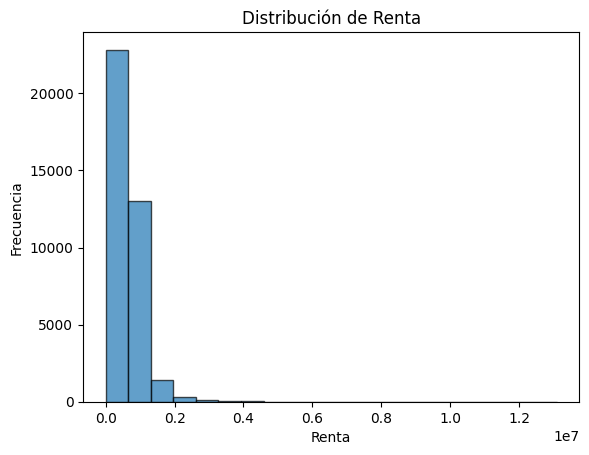

In [12]:
# Gráfico 1: Histograma de Renta
plt.hist(df['Renta'].dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribución de Renta')
plt.xlabel('Renta')
plt.ylabel('Frecuencia')
plt.show()

Representa visualmente la cantidad de clientes por región, ayudando a identificar las regiones con mayor o menor cantidad de clientes.

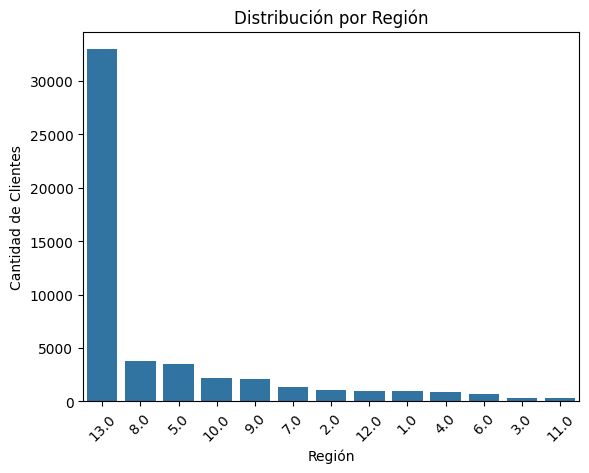

In [13]:
# Gráfico 2: Barras para la distribución por región
sb.countplot(data=df, x='Region', order=df['Region'].value_counts().index)
plt.title('Distribución por Región')
plt.xlabel('Región')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.show()

Ilustra cómo se distribuyen los años de antigüedad de los clientes con una curva de densidad suave, útil para analizar tendencias generales.

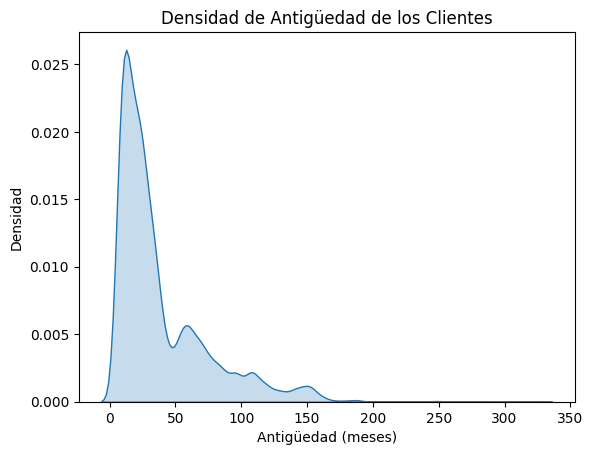

In [14]:
# Gráfico 3: Densidad de Antigüedad
sb.kdeplot(data=df, x='Antiguedad', fill=True)
plt.title('Densidad de Antigüedad de los Clientes')
plt.xlabel('Antigüedad (meses)')
plt.ylabel('Densidad')
plt.show()

Proporciona una visión general de cómo están distribuidas las edades de los clientes en el dataset, permitiendo identificar grupos de edad dominantes

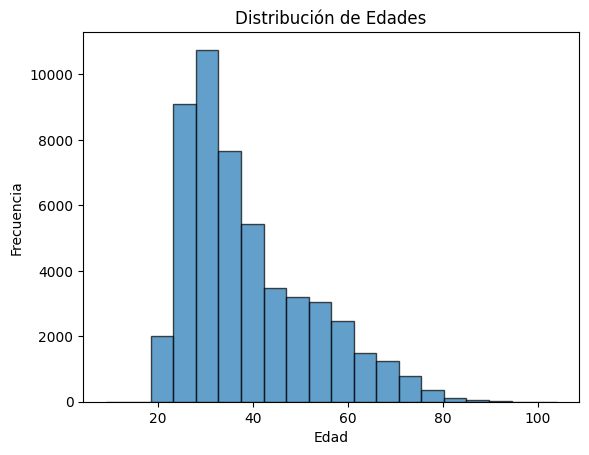

In [15]:
# Histograma de edades
plt.hist(df['Edad'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


Examina la relación entre la edad de los clientes y sus ingresos (Renta), buscando patrones o tendencias.

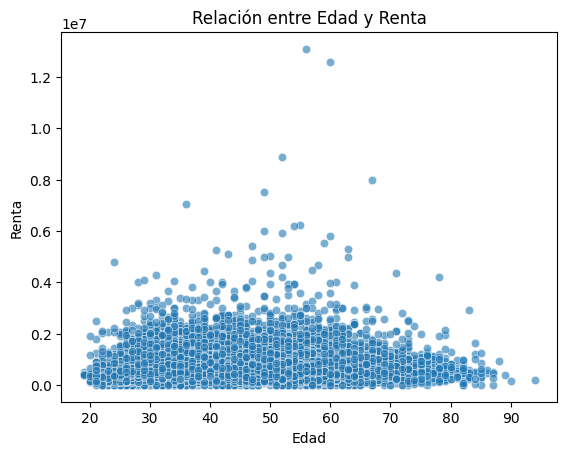

In [16]:
# Gráfico 4: Dispersión entre Edad y Renta
sb.scatterplot(data=df, x='Edad', y='Renta', alpha=0.6)
plt.title('Relación entre Edad y Renta')
plt.xlabel('Edad')
plt.ylabel('Renta')
plt.show()

Muestra la distribución de clientes por género (Sexo), permitiendo analizar si existe algún sesgo en la proporción de géneros.

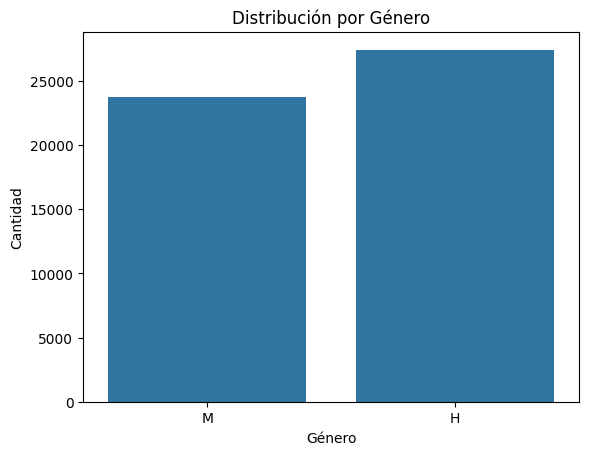

In [17]:

# Gráfico de barras para género
sb.countplot(data=df, x='Sexo')
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

Permite comparar la distribución de los ingresos (Renta) entre géneros, ayudando a identificar diferencias significativas.

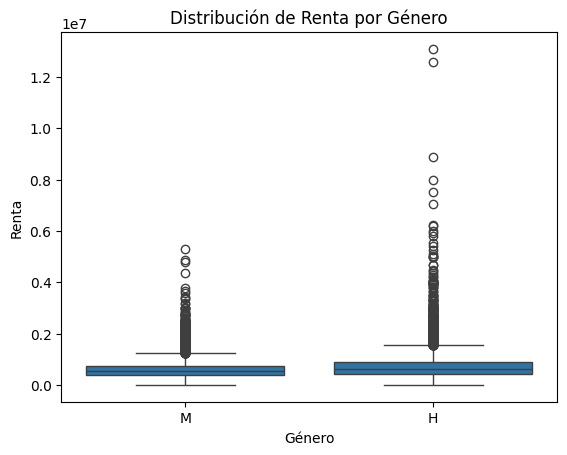

In [18]:
# Gráfico 5: Boxplot de Renta por Género
sb.boxplot(data=df, x='Sexo', y='Renta')
plt.title('Distribución de Renta por Género')
plt.xlabel('Género')
plt.ylabel('Renta')
plt.show()

Indica cuántos clientes utilizan un solo producto (Monoproducto) frente

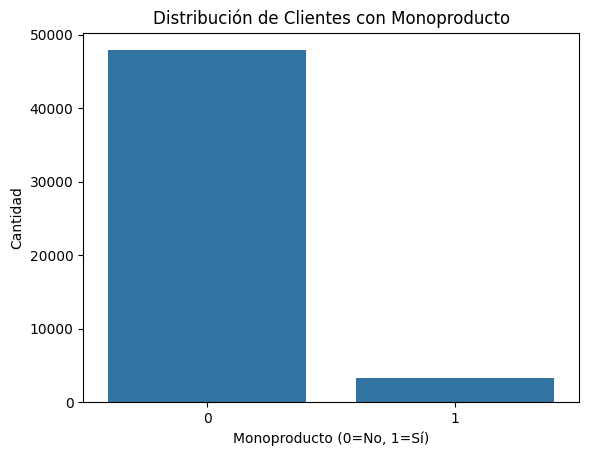

In [19]:
# Gráfico 6: Barras para Monoproducto
sb.countplot(data=df, x='Monoproducto')
plt.title('Distribución de Clientes con Monoproducto')
plt.xlabel('Monoproducto (0=No, 1=Sí)')
plt.ylabel('Cantidad')
plt.show()

Explora cómo los créditos totales se relacionan con la edad de los clientes, buscando patrones de consumo según la etapa de vida.

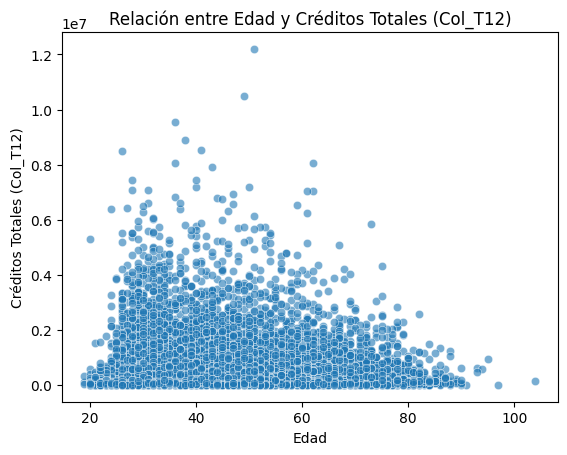

In [20]:
# Gráfico 7: Dispersión entre Col_T12 y Edad
sb.scatterplot(data=df, x='Edad', y='Col_T12', alpha=0.6)
plt.title('Relación entre Edad y Créditos Totales (Col_T12)')
plt.xlabel('Edad')
plt.ylabel('Créditos Totales (Col_T12)')
plt.show()

# PHASE 3: DATA PREPARATION

En esta fase, trabajaremos en la limpieza y transformación del dataset para asegurar que esté listo para análisis y modelado. Esto incluye:

1. Eliminar columnas con datos incompletos o irrelevantes.

2. Manejar valores nulos para evitar sesgos en los resultados.

3. Transformar datos categóricos en formatos numéricos.

4. Detectar y tratar valores atípicos (outliers).

5. Normalizar las variables para mejorar el rendimiento de los modelos.


Lo primero que hacemos en esta fase es crear esta matriz de correlacion para saber con que otras variables Fac_t12 tiene una fuerte correlacion.

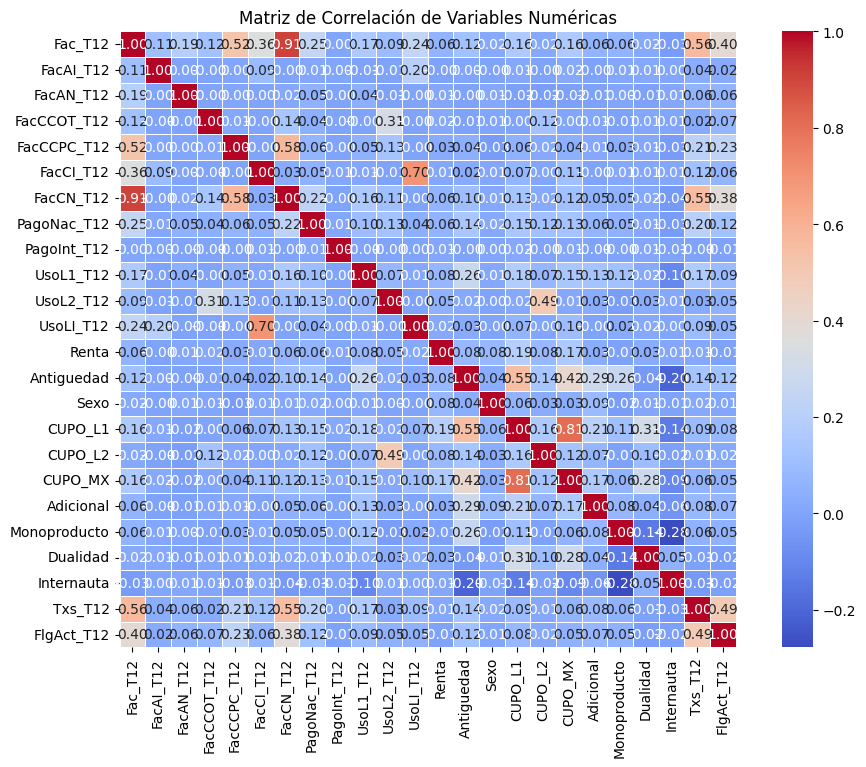

In [75]:


# Seleccionar solo las columnas numéricas del DataFrame filtrado
df_numerico = df_filtrado.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
matriz_correlacion = df_numerico.corr()

# Crear el heatmap para visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sb.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

Seleccionamos únicamente las columnas más relevantes y esenciales del dataset de Monopoly, reduciendo el ruido en los datos y mejorando la eficiencia en el análisis. Esto se hace eliminando las columnas que no aportan directamente al objetivo del proyecto, que es analizar el comportamiento financiero de los clientes, especialmente en la predicción de facturación

In [79]:
# Definir columnas esenciales y relevantes para mantener
columnas_a_mantener = [
    # Esenciales
    'Fac_T12', 'FacAI_T12', 'FacAN_T12', 'FacCCOT_T12', 'FacCCPC_T12',
    'FacCI_T12', 'FacCN_T12', 'PagoNac_T12', 'PagoInt_T12',
    'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12',
    # Relevantes
    'Region', 'Renta', 'Antiguedad',
    'CUPO_L1','CUPO_MX', 'Adicional', 'Monoproducto', 
    'Dualidad', 'Internauta', 'Txs_T12', 'FlgAct_T12'
]

# Filtrar el dataset para conservar solo las columnas necesarias
df_filtrado = df[columnas_a_mantener]

# Mostrar las nuevas dimensiones del dataset
print("Nuevas dimensiones del dataset:", df_filtrado.shape)

# Verificar columnas restantes
print("Columnas restantes en el dataset filtrado:")
print(df_filtrado.columns)


Nuevas dimensiones del dataset: (46584, 23)
Columnas restantes en el dataset filtrado:
Index(['Fac_T12', 'FacAI_T12', 'FacAN_T12', 'FacCCOT_T12', 'FacCCPC_T12',
       'FacCI_T12', 'FacCN_T12', 'PagoNac_T12', 'PagoInt_T12', 'UsoL1_T12',
       'UsoL2_T12', 'UsoLI_T12', 'Region', 'Renta', 'Antiguedad', 'CUPO_L1',
       'CUPO_MX', 'Adicional', 'Monoproducto', 'Dualidad', 'Internauta',
       'Txs_T12', 'FlgAct_T12'],
      dtype='object')


Identificamos las columnas con valores nulas y mostramos la cantidad.

In [77]:
# Contar valores nulos por columna
valores_nulos = df.isnull().sum()

# Mostrar solo columnas con valores nulos
print(valores_nulos[valores_nulos > 0])


Sexo                1
CambioPin       17499
FlgAct_T12       7723
FlgActCN_T12     7723
FlgActCI_T12     7723
                ...  
EeccInt_T02        10
UsoL1_T02          10
UsoL2_T02          10
UsoLI_T02          10
IndRev_T02         10
Length: 508, dtype: int64


Usamos la mediana para columnas numéricas como Renta y un valor categórico para Region para evitar eliminar registros.

In [22]:
# Imputación de valores nulos
df['Renta'] = df['Renta'].fillna(df['Renta'].median())  # Mediana para ingresos
df['Region'] = df['Region'].fillna('Desconocido')      # Categoría 'Desconocido'


Antes de limpiar outliers Y detectamos outliers visualmente con un boxplot 

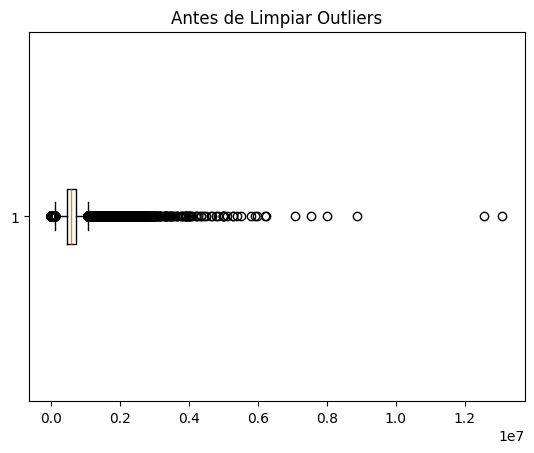

In [23]:
# Antes de limpiar outliers
plt.boxplot(df['Renta'].dropna(), vert=False)
plt.title('Antes de Limpiar Outliers')
plt.show()


usamos el rango intercuartil (IQR) para eliminarlos o ajustarlos.


In [24]:
# Eliminar o ajustar outliers en Renta
q1 = df['Renta'].quantile(0.25)
q3 = df['Renta'].quantile(0.75)
iqr = q3 - q1  # Rango intercuartil
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

df = df[(df['Renta'] >= limite_inferior) & (df['Renta'] <= limite_superior)]


Convertimos las columnas a tipos más adecuados, lo que mejora la eficiencia y la claridad del análisis.

In [25]:
# Verificar y transformar tipos de datos
df['Edad'] = df['Edad'].astype('int8')  # Reducir tamaño en memoria
df['Region'] = df['Region'].astype('category')  # Categorizar regiones


 El heatmap resalta dónde hay valores faltantes en el dataset.

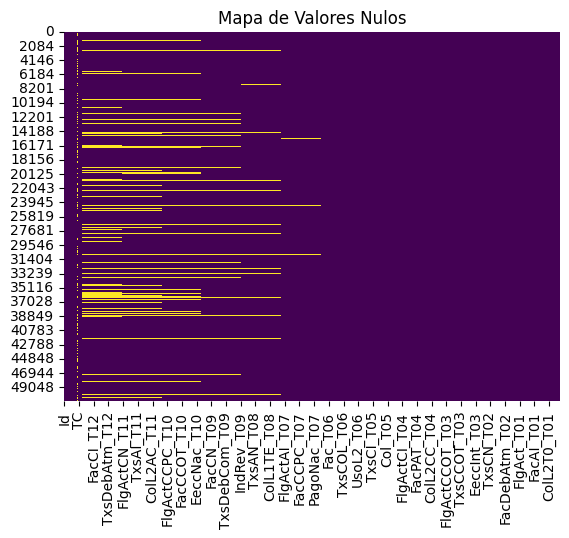

In [26]:
# Visualización de valores nulos
sb.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Valores Nulos')
plt.show()


Después de limpiar outliers


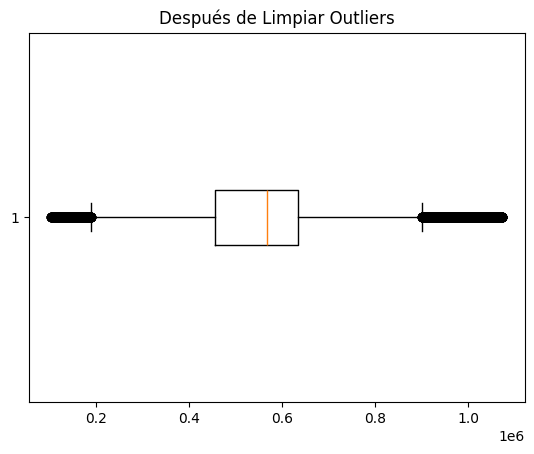

In [27]:
# Después de limpiar outliers
plt.boxplot(df['Renta'], vert=False)
plt.title('Después de Limpiar Outliers')
plt.show()

Confirma que la distribución de una variable clave sigue siendo coherente tras la limpieza.

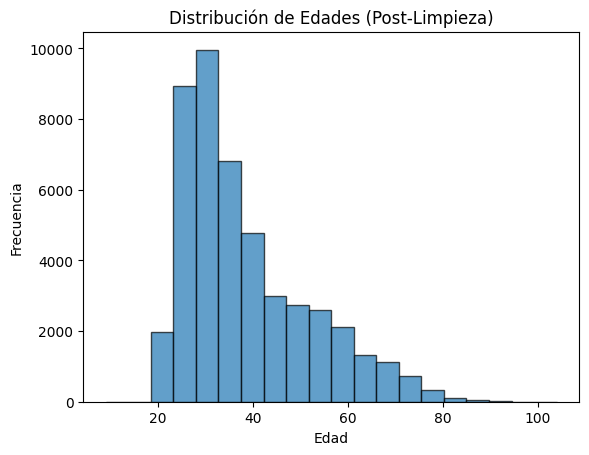

In [28]:
# Distribución de Edad después de limpieza
plt.hist(df['Edad'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribución de Edades (Post-Limpieza)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()
